In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
from prophet import Prophet
import datetime
import matplotlib.dates as mdates
import dateutil
from matplotlib import pyplot
from matplotlib.pyplot import figure
from matplotlib.dates import DateFormatter, MinuteLocator

In [ ]:
from google.colab import files
files.upload()

In [ ]:
df=pd.read_csv('Final Data updated.csv')
df.tail()

Date  Demand  temp  rhum  wdsp  sun
35061  31/12/2020 21:00  3689.5   4.2    92    13  0.0
35062  31/12/2020 22:00  3467.5   4.2    88    13  0.0
35063  31/12/2020 23:00  3423.5   4.3    87    14  0.0
35064  01/01/2021 00:00  3282.0   4.6    85    14  0.0
35065  01/01/2021 01:00  3070.5   4.5    85    11  0.0

In [ ]:
from datetime import datetime 
df['Date']=pd.to_datetime(df['Date'])
df.head()

Date  Demand  temp  rhum  wdsp  sun
0 2017-01-01 00:00:00  2890.0   5.3    91    12  0.0
1 2017-01-01 01:00:00  2658.5   4.9    95     8  0.0
2 2017-01-01 02:00:00  2488.0   5.0    92     8  0.0
3 2017-01-01 03:00:00  2320.0   4.2    90    12  0.0
4 2017-01-01 04:00:00  2221.5   3.6    88    11  0.0

In [ ]:
df = df.rename(columns={'Date':'ds', 'Demand':'y'})

In [ ]:
from matplotlib import style
style.use('ggplot')
plt.rcParams['font.family'] = "serif"
df_train3 = df[['ds', 'y', 'temp', 'wdsp']]
             #.iloc#[:30000]
             #.copy())
df_predict3 = df[['ds', 'temp', 'wdsp']]#.copy()
# modelling external regressors prior to model fitting

model3 = Prophet(daily_seasonality=True,
                weekly_seasonality=False,
                yearly_seasonality=False,
                growth='linear',
                seasonality_mode='multiplicative',
                changepoint_prior_scale=30,
                seasonality_prior_scale='35',
                interval_width=0.80,).add_seasonality(name='monthly',
              period=30.5,
              fourier_order=12).add_seasonality(name='daily',
              period=1,
              fourier_order=15).add_seasonality(name='weekly',
              period=7,
              fourier_order=20).add_seasonality(name='yearly',
              period=365.25,
              fourier_order=20,prior_scale=15)


model3.add_country_holidays(country_name='Ireland')

model3.add_regressor('temp')
model3.add_regressor('wdsp')


# fit and predcit
model3.fit(df_train3)
forecast3 = model3.predict(df_predict3)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpuubcia3n/ng6xk_hl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuubcia3n/4bgpo1v7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96935', 'data', 'file=/tmp/tmpuubcia3n/ng6xk_hl.json', 'init=/tmp/tmpuubcia3n/4bgpo1v7.json', 'output', 'file=/tmp/tmpc4d7mq8o/prophet_model-20220729094522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:45:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:48:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


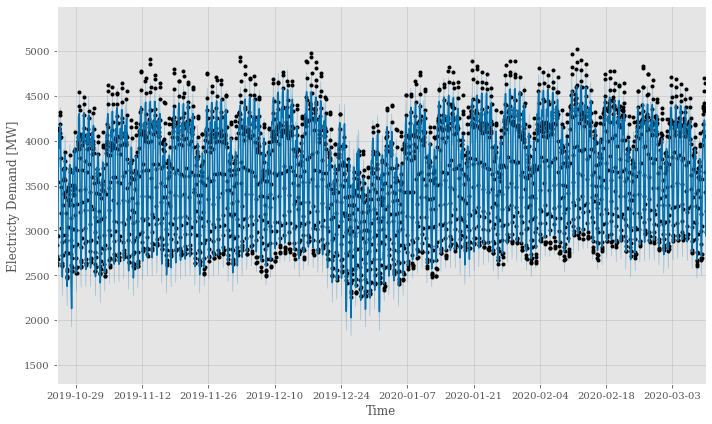

In [ ]:
import datetime
fig1 = model3.plot(forecast3, uncertainty=True)
#plt.xlim([datetime.date(2019,11, 1), datetime.date(2020, 1, 1)])
plt.xlim([datetime.date(2019,10, 25), datetime.date(2020, 3, 10)])
plt.xlabel("Time")
plt.ylabel("Electricty Demand [MW]")
plt.savefig('missingpeaks.pdf')

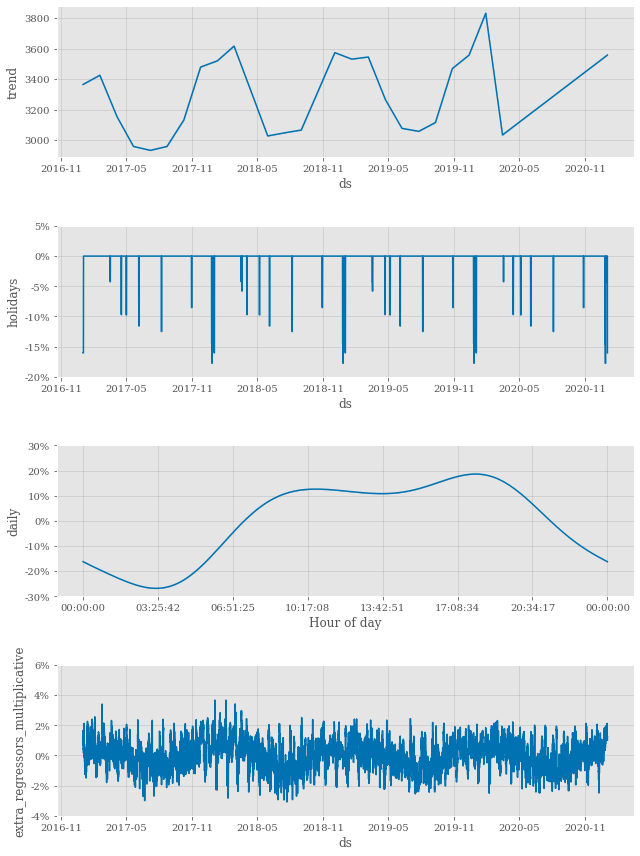

In [ ]:
from matplotlib import style
style.use('ggplot')
plt.rcParams['font.family'] = "serif"
fig2 = model3.plot_components(forecast3, uncertainty=True)
plt.savefig('components2.pdf')

In [ ]:
from prophet.diagnostics import cross_validation
future3=model3.make_future_dataframe(freq='H',periods=24*30)
forecast3 = model3.predict(df_train3)
cv_3=cross_validation(model3,initial='12000hours',period='3600hours',horizon='168hours')

  0%|          | 0/7 [00:00<?, ?it/s]

09:05:19 - cmdstanpy - INFO - Chain [1] start processing
09:06:14 - cmdstanpy - INFO - Chain [1] done processing
09:06:19 - cmdstanpy - INFO - Chain [1] start processing
09:07:09 - cmdstanpy - INFO - Chain [1] done processing
09:07:13 - cmdstanpy - INFO - Chain [1] start processing
09:08:07 - cmdstanpy - INFO - Chain [1] done processing
09:08:12 - cmdstanpy - INFO - Chain [1] start processing
09:09:29 - cmdstanpy - INFO - Chain [1] done processing
09:09:34 - cmdstanpy - INFO - Chain [1] start processing
09:10:55 - cmdstanpy - INFO - Chain [1] done processing
09:11:00 - cmdstanpy - INFO - Chain [1] start processing
09:12:48 - cmdstanpy - INFO - Chain [1] done processing
09:12:54 - cmdstanpy - INFO - Chain [1] start processing
09:15:51 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
from prophet.diagnostics import  performance_metrics
df_pm3=performance_metrics(cv_3)

In [ ]:
df_pm3.head()

horizon           mse        rmse         mae      mape     mdape  \
0 0 days 17:00:00  46197.349924  214.935688  172.208836  0.051454  0.044972   
1 0 days 18:00:00  46539.796568  215.730843  176.309410  0.051951  0.046163   
2 0 days 19:00:00  45508.713328  213.327713  174.538747  0.050681  0.046163   
3 0 days 20:00:00  44296.680174  210.467765  171.246638  0.049057  0.044985   
4 0 days 21:00:00  43107.114001  207.622528  167.654757  0.047587  0.040066   

      smape  coverage  
0  0.052260  0.703297  
1  0.052486  0.686203  
2  0.050998  0.686203  
3  0.049283  0.694750  
4  0.047835  0.699634

/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


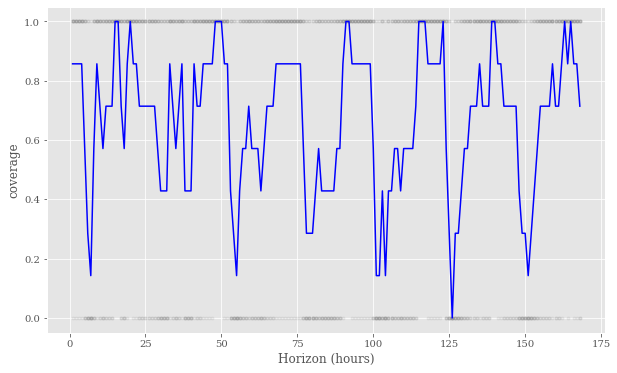

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(cv_3,metric='coverage',rolling_window=0.0)

In [ ]:
from prophet.plot import plot_plotly
import plotly.io as plt_io
import plotly.offline as py
import plotly.express as px

fig=plot_plotly(model3,forecast3,xlabel='Time',ylabel='Electricty Demand [MW]',uncertainty=True)
fig.layout.template = 'ggplot2'
py.iplot(fig)

<Figure size 432x288 with 0 Axes>

In [ ]:
df_1wk = df_predict3.iloc[:7]
df_1wk

ds  temp  wdsp
0 2017-01-01 00:00:00   5.3    12
1 2017-01-01 01:00:00   4.9     8
2 2017-01-01 02:00:00   5.0     8
3 2017-01-01 03:00:00   4.2    12
4 2017-01-01 04:00:00   3.6    11
5 2017-01-01 05:00:00   2.8    12
6 2017-01-01 06:00:00   1.7    13

In [ ]:
# fetching the posterior samples.
samples = model3.predictive_samples(df_1wk)
df_samples = pd.DataFrame(data=samples['yhat'], index=df_1wk['ds']).reset_index()
df_samples

ds            0  ...          998          999
0 2017-01-01 00:00:00  2345.909029  ...  2275.783315  2391.539734
1 2017-01-01 01:00:00  2326.124555  ...  2084.302828  1822.921572
2 2017-01-01 02:00:00  2053.453792  ...  2138.458691  2352.343370
3 2017-01-01 03:00:00  1982.523791  ...  1563.869558  1699.498853
4 2017-01-01 04:00:00  1648.981658  ...  2085.430500  2133.738681
5 2017-01-01 05:00:00  2113.407544  ...  2077.637663  2122.568934
6 2017-01-01 06:00:00  2087.211257  ...  2125.186969  2295.354139

[7 rows x 1001 columns]

In [ ]:
forecast3[forecast3['ds'] == '2018-09-02'][['ds', 'yhat']]

ds         yhat
14616 2018-09-02  2511.690398

In [ ]:
df_samples[df_samples['ds'] == '2018-09-02'].set_index('ds').mean(axis=1)

Series([], dtype: float64)